The objective of this project is to try and predict the Nenana River Ice Challenge.  

count    104.000000
mean     124.583016
std        6.558051
min      104.014600
25%      120.316825
50%      124.497900
75%      128.910225
max      141.486800
Name: Decimal Day of Year, dtype: float64
   Year  Decimal Day of Year  Month  Day      Time               Date Time  \
0  1917             120.4792  April   30  11:30 AM  04/30/1917 11:30:00 AM   
1  1918             131.3979    May   11   9:33 AM  05/11/1918 09:33:00 AM   
2  1919             123.6063    May    3   2:33 PM  05/03/1919 02:33:00 PM   
3  1920             132.4486    May   11  10:46 AM  05/11/1920 10:46:00 AM   
4  1921             131.2792    May   11   6:42 AM  05/11/1921 06:42:00 AM   

   Decade  
0    1910  
1    1910  
2    1910  
3    1920  
4    1920  
124.58301634615385


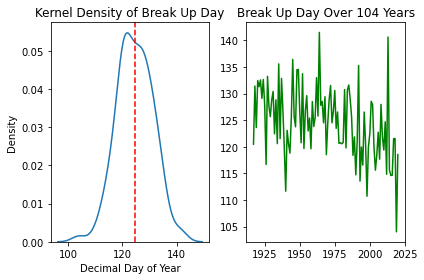

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

ice_df = pd.read_csv('Nenana_Ice_Classic__Ice_Breakup_Data.csv')
print(ice_df['Decimal Day of Year'].describe())

fig1, (ax1, ax2) = plt.subplots(1,2)

sns.kdeplot(data=ice_df, x='Decimal Day of Year', ax=ax1)
ax1.axvline(np.mean(ice_df['Decimal Day of Year']), c='red', ls='--')
ax1.set_title('Kernel Density of Break Up Day')

ax2.plot(ice_df['Year'], ice_df['Decimal Day of Year'], c='green')
ax2.set_title('Break Up Day Over 104 Years')

fig1.tight_layout()

def decader(value):
    string_yr = str(value)
    return int(string_yr[:3]+'0')

ice_df['Decade'] = ice_df['Year'].apply(lambda x: decader(x))
print(ice_df.head())
print(np.mean(ice_df['Decimal Day of Year']))


A strange little hump at about 120 isn't textbook normal distribution.  Looking at the line graph 120 day break up looks to be pretty common between about 1980 to 2010.  This could be suggesting that the mean is moving closer to 120 than the current 125.  This next block will test if the time of break up is normally distributed using Lilliefor's test and looking at the QQ plots.

0.055516723711522165 0.612388525602074


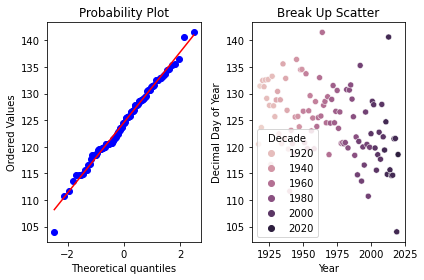

In [2]:
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

ksstat, pvalue = lilliefors(ice_df['Decimal Day of Year'], dist='norm')
print(ksstat, pvalue)

fig, (ax1, ax2) = plt.subplots(1,2)
stats.probplot(ice_df['Decimal Day of Year'], dist='norm', plot=ax1)
sns.scatterplot(data=ice_df, x='Year', y='Decimal Day of Year', hue='Decade',ax=ax2)
ax2.set_title('Break Up Scatter')
fig.tight_layout()


Lilliefor's test confirms the null hypothesis which is that this is normally distributed.  However, on the QQ plot we see around days 115 to 123 deviate most off the normal distribution.  There is likely some autocorrelation, ie break ups happen at similar times as years closer together.  So next we revist the scatter plot cluster out different years and look at the distributions in those clusters.  

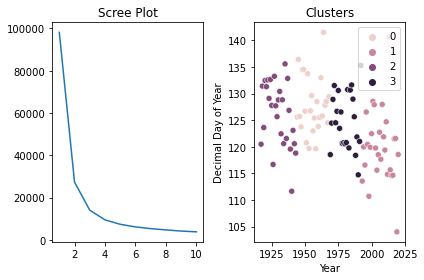

In [32]:
from sklearn.cluster import KMeans
X = ice_df[['Decimal Day of Year', 'Year']]
scree = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    scree.append(kmeans.inertia_)

fig, (ax1, ax2) = plt.subplots(1, 2)

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
ice_df['cluster'] = kmeans.fit_predict(ice_df[['Decimal Day of Year', 'Year']])

ax1.plot(range(1,11), scree)
ax1.set_title('Scree Plot')
sns.scatterplot(data=ice_df, x='Year', y='Decimal Day of Year', hue='cluster', ax=ax2)
ax2.set_title('Clusters')
ax2.legend(loc='upper right')
fig.tight_layout()

